# First implementation of Machine Learning Algorithm

In this file, we are going to import data from a file .csv that we take from chornograf.
We have to parse him and put into an array.
Finally we will insert some machin Learning algorithm with the librairy sklearn.

To do this, we will use some librairy as pandas, matplotlib, numpy, sklearn and some others.


Le fichier data2learn2.csv a pour query ceci : 

SELECT mean("moisture-percent") AS "mean_moisture-percent" ,  mean("temperature") AS "mean_temperature"

FROM "demeter"."autogen"."chirp-left" 

WHERE time > now() - 1200h AND time < now() -700h

GROUP BY time(30m)

In [1]:
from sklearn import linear_model
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dans le fichier DataAll.csv

Toutes les données de puis 1300h à partir 7 mars au 30 avril

SELECT mean("temperature") AS "mean_temperature", mean("moisture-percent") AS "mean_moisture-percent" 

FROM "demeter"."autogen"."chirp-left" 

WHERE time > now() - 1300h 

GROUP BY time(30m) FILL(null)

In [2]:
#Data place 
tabl = []

name = 'Data2learn.csv'

nameTabl = []
with open(name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    ligne = 0
    for row in csv_reader:
        if ligne != 0:
            i = 0
            for el in row:
                tabl[i].append(el)
                i += 1
        else:
            for el in row:
                tabl.append([])
                nameTabl.append(el)
                
        ligne += 1
        
#print(tabl)
print(nameTabl)



['date', 'mean_moisture-percent', 'mean_temperature']


# Import des données 

Leccture d'un fichier csv en un fichier dataframe.

Création d'une base dataframe avec comme colonne le temps, l'humidité, la tempérture, l'humidité + 1, la température + 1.

Il faut régler le problème tu dernier temps.

In [2]:
df = pd.read_csv('DataAll.csv')
#print(df)
#print(df.iloc[:,2])

#Création des deux autres colonnes
df['moistureAdd'] = df.index
df['temperatureAdd'] = df.index

# size
dt = 30
nligne = df.shape[0]
nColumn = df.shape[1]
tmp = np.linspace(0,nligne-2,nligne-1,dtype=int)
df.iloc[tmp, 3] = pd.Series(np.append(df.iloc[tmp+1,1].to_numpy()-df.iloc[tmp,1].to_numpy(),0), index=df.index)
df.iloc[tmp, 4] = pd.Series(np.append(df.iloc[tmp+1,2].to_numpy()-df.iloc[tmp,2].to_numpy(),0), index=df.index)

#Ajout de la ligne
df.iloc[nligne-1, 3] = 0
df.iloc[nligne-1, 4] = 0


#df


## Ajout de l'arrosage

L'arrosage est ajouté au temps 10h30.

In [3]:
import datetime

df['Arrosage'] = df.index
df['TAfterArrosage'] = df.index

j = 0
df.iloc[:,5] = 0
for i in range(nligne):
    if i in df.loc[df['moistureAdd'] >= 3].index:
        if pd.to_datetime(df.iloc[i,0]) < datetime.datetime(2019, 3, 28,0,0,0):
            df.iloc[int(i),5] = 10
        elif pd.to_datetime(df.iloc[i,0]) < datetime.datetime(2019, 4, 18,0,0,0):
            df.iloc[int(i),5] = 20
        elif pd.to_datetime(df.iloc[i,0]) < datetime.datetime(2019, 5, 3,0,0,0):
            df.iloc[int(i),5] = 40
        else:
            df.iloc[int(i),5] = 35
        j = 0
    df.iloc[int(i),6] = j*30
    j = j + 1
    
df

,date,mean_moisture-percent,mean_temperature,moistureAdd,temperatureAdd,Arrosage,TAfterArrosage
0,3/7/2019 4:00:00.000000000 PM,34.397143,30.042857,1.328571e-01,-1.062857,0,0
1,3/7/2019 4:30:00.000000000 PM,34.530000,28.980000,-2.000000e-02,-1.631667,0,30
2,3/7/2019 5:00:00.000000000 PM,34.510000,27.348333,-7.666667e-02,-0.236667,0,60
3,3/7/2019 5:30:00.000000000 PM,34.433333,27.111667,-4.666667e-02,-0.271667,0,90
4,3/7/2019 6:00:00.000000000 PM,34.386667,26.840000,-1.600000e-01,-0.258333,0,120
5,3/7/2019 6:30:00.000000000 PM,34.226667,26.581667,-4.166667e-01,-0.560000,0,150
6,3/7/2019 7:00:00.000000000 PM,33.810000,26.021667,-2.666667e-02,-0.405000,0,180
7,3/7/2019 7:30:00.000000000 PM,33.783333,25.616667,-9.333333e-02,-0.220000,0,210
8,3/7/2019 8:00:00.000000000 PM,33.690000,25.396667,-2.433333e-01,-0.151667,0,240
9,3/7/2019 8:30:00.000000000 PM,33.446667,25.245000,-2.233333e-01,-0.110000,0,270


# Delete NaN Value

In [4]:
i = 40
while(i+48 < nligne):
    if df.iloc[range(i,i+48),:].isnull().values.any():
        df.drop(df.index[range(i,i+48)],axis = 0,inplace = True)
        nligne = df.shape[0]
        print(i)
    else:
        i = i + 48
print(i)
print(nligne)

1192
1192
2200
2200
2392
2409


In [5]:
print(df.isnull().sum())
for i in range(nligne):
    if df.iloc[i,:].isnull().values.any():
        print(df.index[i])
        

date                     0
mean_moisture-percent    0
mean_temperature         0
moistureAdd              0
temperatureAdd           0
Arrosage                 0
TAfterArrosage           0
dtype: int64


# Analyse de la dataFrame


## Linear Regression Multiple Variables sans l'information sur le temps sans arrosage



In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['mean_moisture-percent','mean_temperature','Arrosage']],df.moistureAdd)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
reg.coef_

array([-0.01936119, -0.01781003,  0.29968965])

In [8]:
reg.intercept_

0.7297623637210241

In [9]:
reg.predict([[31,25,10]])[0]

2.681211023400035

## Linear Regression Multiple Variables AVEC l'information sur le temps sans arrosage

In [10]:
reg2 = linear_model.LinearRegression()
reg2.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
reg2.coef_

array([-0.0128074 ,  0.0025874 ,  0.30919472,  0.00031434])

In [12]:
reg2.intercept_

-0.16466044315677464

In [13]:
reg2.predict([[31,25,10,0]])[0]

2.5949424064751812

# Test de mes résultats

SANS DES DONNÉES POUR VERIFICATIONS. PAS DE DATA TEST.

Le but est de faire une boucle sur une période en utilisant les valeurs obtenus à l'itérations précédentes

Creation de liste de planification de l'arrosage pour le test

In [14]:
TestSize = 20 #Taille du Test

testArrosage = np.zeros(TestSize)
testArrosage[2] = 10  #Position de notre arrosage et valeur
testArrosage

array([  0.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

Création de la liste de plannification de la temperature pour notre test

In [15]:
PosTemperature = np.linspace(980,980+TestSize-1,TestSize)
testTemperature = (df.iloc[PosTemperature, 2]).values
testTemperature

array([ 26.03333333,  25.89      ,  25.80166667,  25.8       ,
        25.79333333,  25.70333333,  25.7       ,  25.69833333,
        25.61333333,  25.6       ,  25.635     ,  25.715     ,
        25.72333333,  20.065     ,  22.34333333,  24.56166667,
        25.635     ,  26.05      ,  24.62333333,  25.58666667])

Mise en place du test sur le nombre d'itération souhaité

In [16]:
StartHumidity = 10
result = np.zeros(TestSize)
for i in range(0,TestSize):
    result[i] = StartHumidity + reg.predict([[StartHumidity,testTemperature[i],testArrosage[i]]])[0]
    StartHumidity = result[i]

result

array([ 10.07249595,  10.14614105,  13.21682999,  13.23119994,
        13.2454104 ,  13.26094864,  13.2762454 ,  13.29127568,
        13.30752881,  13.32370472,  13.33894411,  13.35246363,
        13.36557299,  13.47920362,  13.55005704,  13.58003007,
        13.59030669,  13.59299317,  13.62103662,  13.63138012])



## Test avec data Test

Création d'une data frame pour effectuer les tests.

Voici la query effectuer pour obtenir les données.

SELECT mean("moisture-percent") AS "mean_moisture-percent" ,  mean("temperature") AS "mean_temperature"

FROM "demeter"."autogen"."chirp-left" 

WHERE time > now() - 700h AND time < now() -400h

GROUP BY time(30m)

Pour le fichier Data30AprilTo8Mai.csv voici la query effectuer : 

SELECT mean("moisture-percent") AS "mean_moisture-percent" FROM "demeter"."autogen"."chirp-left" WHERE time > now() - 200h GROUP BY time(30m) FILL(null)

In [17]:
#dfTest = pd.read_csv('DataTest.csv')
dfTest = pd.read_csv('Data30AprilTo8Mai.csv')

#initdatatest = 31
initdatatest = 17

dfTest['moistureAdd'] = dfTest.index
dfTest['temperatureAdd'] = dfTest.index


# size
nligneTest = dfTest.shape[0]
nColumnTest = dfTest.shape[1]
tmp = np.linspace(0,nligneTest-2,nligneTest-1,dtype=int)
dfTest.iloc[tmp, 3] = pd.Series(np.append(dfTest.iloc[tmp+1,1].to_numpy()-dfTest.iloc[tmp,1].to_numpy(),0), index=dfTest.index)
dfTest.iloc[tmp, 4] = pd.Series(np.append(dfTest.iloc[tmp+1,2].to_numpy()-dfTest.iloc[tmp,2].to_numpy(),0), index=dfTest.index)

#Ajout de la ligne
dfTest.iloc[nligneTest-1, [3,4]] = 0
print(nligneTest)

401


In [18]:
import datetime

dfTest['Arrosage'] = dfTest.index
dfTest['TAfterArrosage'] = dfTest.index

j = 0
dfTest.iloc[:,5] = 0
for i in range(nligneTest):
    if i in dfTest.loc[dfTest['moistureAdd'] >= 3].index:
        if pd.to_datetime(dfTest.iloc[i,0]) < datetime.datetime(2019, 3, 28,0,0,0):
            dfTest.iloc[int(i),5] = 10
        elif pd.to_datetime(dfTest.iloc[i,0]) < datetime.datetime(2019, 4, 18,0,0,0):
            dfTest.iloc[int(i),5] = 20
        elif pd.to_datetime(dfTest.iloc[i,0]) < datetime.datetime(2019, 5, 3,0,0,0):
            dfTest.iloc[int(i),5] = 40
        else:
            dfTest.iloc[int(i),5] = 35
        j = 0
    dfTest.iloc[int(i),6] = j*30
    j = j + 1
    


# Delete NaN element

In [20]:

i = initdatatest
while(i+48 < nligneTest-initdatatest):
    if dfTest.iloc[range(i,i+48),:].isnull().values.any():
        dfTest.drop(dfTest.index[range(i,i+48)],axis = 0,inplace = True)
        nligneTest = dfTest.shape[0]
        print(i)
    else:
        i = i + 48
dfTest.drop(dfTest.index[range(0,initdatatest)],axis = 0,inplace = True)
nligneTest = dfTest.shape[0]


## Test avec les donnes SANS le temps

In [21]:
init = 0+48*0
dfTest['resultSansT'] = dfTest.index

StartHumidity = dfTest.iloc[init,1]
TestSize = nligneTest
result = np.zeros(TestSize)
for i in range(0,TestSize):
    dfTest.iloc[int(i+init),7] = StartHumidity

    if i%48 == 0:
        StartHumidity = dfTest.iloc[init+i,1]
    result[i] = StartHumidity + reg.predict([[StartHumidity,dfTest.iloc[init+i,2],dfTest.iloc[init+i,5]]])[0]
    StartHumidity = result[i]
    

#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrSansTemps = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,7].values)
print("Moyenne d'erreur : ",ErrSansTemps)



Moyenne d'erreur :  -3.82201707503


## Test avec les donnes AVEC le temps

In [22]:
init = 0+48*0
dfTest['resultAvecT'] = dfTest.index

StartHumidity = dfTest.iloc[init,1]

TestSize = nligneTest
result2 = np.zeros(TestSize)
for i in range(0,TestSize):
    dfTest.iloc[int(i+init),8] = StartHumidity

    if i%48 == 0:
        StartHumidity = dfTest.iloc[init+i,1]
    result2[i] = StartHumidity + reg2.predict([[StartHumidity,dfTest.iloc[init+i,2],dfTest.iloc[init+i,5],dfTest.iloc[init+i,6]]])[0]
    StartHumidity = result2[i]

#print(result2)
#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrTemps = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,8].values)
print("Moyenne d'erreur : ",ErrTemps)


Moyenne d'erreur :  -3.28642586738


In [23]:
dfTest.iloc[48]

date                     5/1/2019 11:30:00.000000000 AM
mean_moisture-percent                            21.915
mean_temperature                                  24.28
moistureAdd                                        8.29
temperatureAdd                                   -0.615
Arrosage                                             40
TAfterArrosage                                        0
resultSansT                                      22.553
resultAvecT                                     23.7859
Name: 65, dtype: object

# Partage de la Data frame

Partage de la data frame en deux. 

Une partie qui contient que les moments où on arrose. On peut selectionner ceci grace à loc et à df['TAfterArrosage'] == 0. Quand on arrose, le temps après arrosage est de 0.

L'autre partie contient les moments où on n'arrose pas. C'est-à-dire les momments où l'eau s'évapore.

In [24]:
dfArrosage = df.loc[df['TAfterArrosage'] == 0]
dfEvaporation = df.loc[df['TAfterArrosage'] > 0]


In [25]:
regLinearAro = linear_model.LinearRegression()
regLinearAro.fit(dfArrosage[['mean_moisture-percent','mean_temperature','Arrosage']],dfArrosage.moistureAdd)

regLinearAro.intercept_
regLinearAro.coef_

array([ 0.00318094, -0.53627575,  0.07456596])

In [26]:
# Pour faire le régression linear sur le moment d'arrosage

regLinearEva = linear_model.LinearRegression()
regLinearEva.fit(dfEvaporation[['mean_moisture-percent','mean_temperature','TAfterArrosage']],dfEvaporation.moistureAdd)

regLinearEva.intercept_
regLinearEva.coef_

array([-0.00911625,  0.02408432,  0.00055585])

In [27]:
#Pour tester sur la base de données de training
init = 0
base = dfTest 

In [28]:
dfTest['resultSepare'] = dfTest.index
StartHumidity = base.iloc[init,1]

TestSize = nligneTest
ErrAro = 0
result = np.zeros(TestSize)
ErrEva = 0
nAro = 0

for i in range(0,TestSize):
    dfTest.iloc[int(i+init),9] = StartHumidity

    if i%48 == 0:
        nAro =+ 1
        StartHumidity = dfTest.iloc[init+i,1]
        result[i] = StartHumidity + regLinearAro.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,5]]])[0]
        ErrAro =+ dfTest.iloc[int(i),9] - base.iloc[i,1]
    else: 
        result[i] = StartHumidity + regLinearEva.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,6]]])[0]
        ErrEva =+ dfTest.iloc[int(i),9] - base.iloc[i,1]

    StartHumidity = result[i]


ErrAro = ErrAro/nAro
ErrEva = ErrEva/(TestSize-nAro)

print("Moyenne Erreur d'Arrosage : ", ErrAro)
print("Moyenne d'erreur evaporation : ", ErrEva)
ErrSepare = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,9].values)
print("Moyenne d'erreur : ",ErrSepare)

Moyenne Erreur d'Arrosage :  -1.33965668202
Moyenne d'erreur evaporation :  -0.00440886223002
Moyenne d'erreur :  -0.466874285852


# Affichage des résultats

On Affiche les resultats

In [29]:
print("Sans le temps : ", ErrSansTemps)
print("Avec le temps : ", ErrTemps)

#print("\nDurant Arrosage : ",ErrAro)
#print("Evaporation : " , ErrEva)
print("Avec Temps Séparé : ", ErrSepare)


Sans le temps :  -3.82201707503
Avec le temps :  -3.28642586738
Avec Temps Séparé :  -0.466874285852


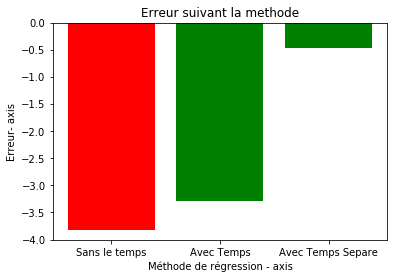

In [30]:
# x-coordinates of left sides of bars  
left = [1, 2, 3] 
  
# heights of bars 
height = [ErrSansTemps, ErrTemps, ErrSepare] 
  
# labels for bars 
tick_label = ['Sans le temps', 'Avec Temps', 'Avec Temps Separe'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','green']) 

# naming the x-axis 
plt.xlabel('Méthode de régression - axis') 
# naming the y-axis 
plt.ylabel('Erreur- axis') 
# plot title 
plt.title('Erreur suivant la methode') 
  
# function to show the plot 
plt.show() 

# Graphic

Creation des graphics de la courbe d'évolution de la température



Text(0,0.5,'moisture-percent')

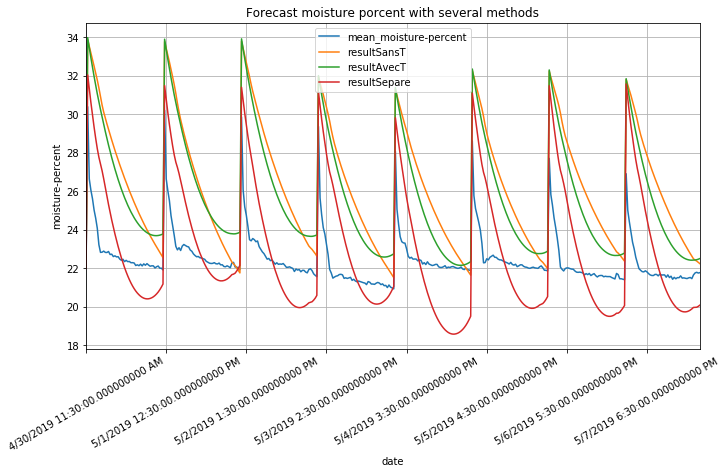

In [31]:
ax = dfTest.plot(x='date', y=['mean_moisture-percent','resultSansT','resultAvecT','resultSepare'],figsize=(11, 6),rot=30,grid=True, title="Forecast moisture porcent with several methods")
ax.set_ylabel("moisture-percent")


In [32]:
reg3 = linear_model.Lasso(alpha=1.5)
reg3.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)
reg3.intercept_
reg3.coef_


array([ -0.00000000e+00,  -0.00000000e+00,   1.71359953e-01,
         8.74546176e-05])

In [33]:
init = 0+48*0
dfTest['resultAutre'] = dfTest.index

StartHumidity = dfTest.iloc[init,1]

TestSize = nligneTest
result2 = np.zeros(TestSize)
for i in range(0,TestSize):
    dfTest.iloc[int(i+init),10] = StartHumidity

    if i%48 == 0:
        StartHumidity = dfTest.iloc[init+i,1]
    result2[i] = StartHumidity + reg3.predict([[StartHumidity,dfTest.iloc[init+i,2],dfTest.iloc[init+i,5],dfTest.iloc[init+i,6]]])[0]
    StartHumidity = result2[i]

#print(result2)
#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrAutre = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,10].values)
print("Moyenne d'erreur : ",ErrAutre)

Moyenne d'erreur :  -3.10628303661


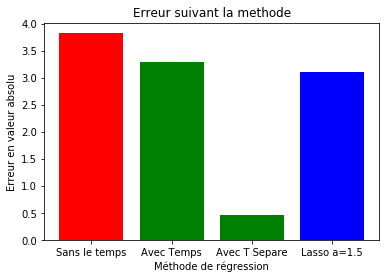

In [34]:
# x-coordinates of left sides of bars  
left = [1, 2, 3,4] 
  
# heights of bars 
height = [ErrSansTemps, ErrTemps, ErrSepare,ErrAutre]
height = [abs(x) for x in height]
  
# labels for bars 
tick_label = ['Sans le temps', 'Avec Temps', 'Avec T Separe','Lasso a=1.5'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','green','blue']) 
  
# naming the x-axis 
plt.xlabel('Méthode de régression') 
# naming the y-axis 
plt.ylabel('Erreur en valeur absolu') 
# plot title 
plt.title('Erreur suivant la methode') 
  
# function to show the plot 
plt.show() 

Text(0,0.5,'moisture-percent')

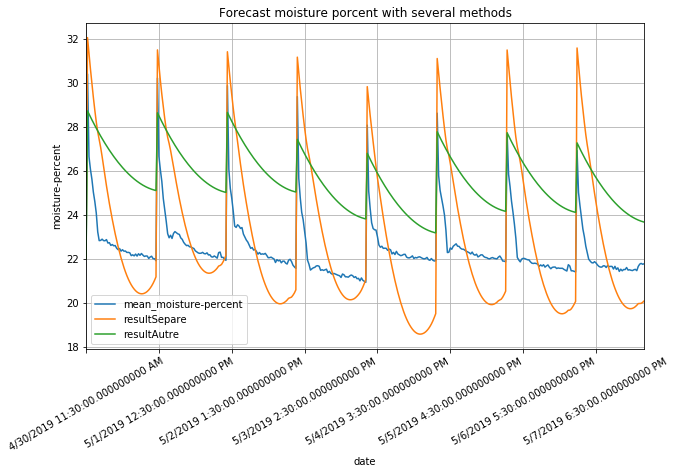

In [35]:
from pylab import *
ax = dfTest.plot(x='date', y=['mean_moisture-percent','resultSepare','resultAutre'],figsize=(10, 6),rot=30,grid=True, title="Forecast moisture porcent with several methods")
ax.set_ylabel("moisture-percent")


Text(0,0.5,'moisture-percent')

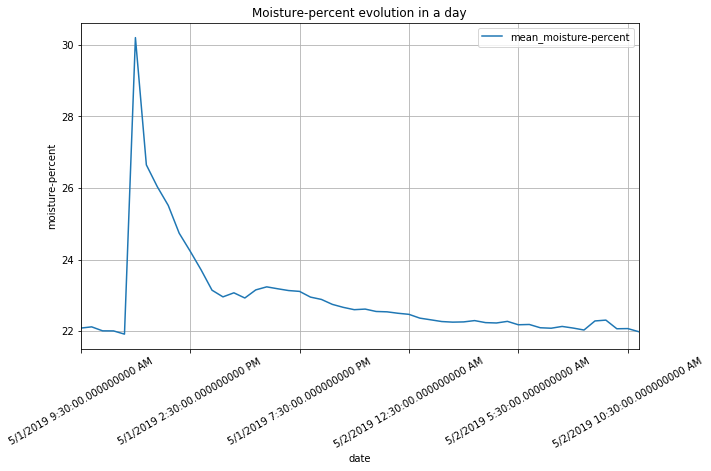

In [36]:
dfGraph = dfTest.iloc[range(44,96),:]
ax = dfGraph.plot(x='date', y=['mean_moisture-percent'],figsize=(10, 6),rot=30,grid=True, title="Moisture-percent evolution in a day")
ax.set_ylabel("moisture-percent")

In [37]:
print("Sans le temps : ", ErrSansTemps)
print("Avec le temps : ", ErrTemps)

#print("\nDurant Arrosage : ",ErrAro)
#print("Evaporation : " , ErrEva)
print("Avec Temps Séparé : ", ErrSepare)
print("Avec Lasso a = 1.5 : ", ErrAutre)

Sans le temps :  -3.82201707503
Avec le temps :  -3.28642586738
Avec Temps Séparé :  -0.466874285852
Avec Lasso a = 1.5 :  -3.10628303661
